In [1]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
client_id = "GQoSnihbi0jumC4YKPz3"
client_secret = "dM_4qsYpGr"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\"""," \
       "\"endDate\":\"2017-04-30\"," \
       "\"timeUnit\":\"date\"," \
       "\"keywordGroups\":[" \
       "{\"groupName\":\"해외주식\",\"keywords\":[\"테슬라\",\"아마존\",\"마이크로소프트\"]}," \
       "{\"groupName\":\"국내주식\",\"keywords\":[\"삼성전자\",\"네이버\",\"sk하이닉스\"]}" \
       "]," \
       "\"device\":\"pc\"," \
       "\"ages\":[\"3\",\"4\",\"5\",\"6\",\"7\"]," \
       "\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    # print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [2]:
import json
result=json.loads(response_body)

In [3]:
foreign_stock=[]
for _ in result['results'][0]['data']:
    foreign_stock.append(_['ratio'])

local_stock=[]
for _ in result['results'][1]['data']:
    local_stock.append(_['ratio'])

period = []
for _ in result['results'][0]['data']:
    period.append(_['period'])

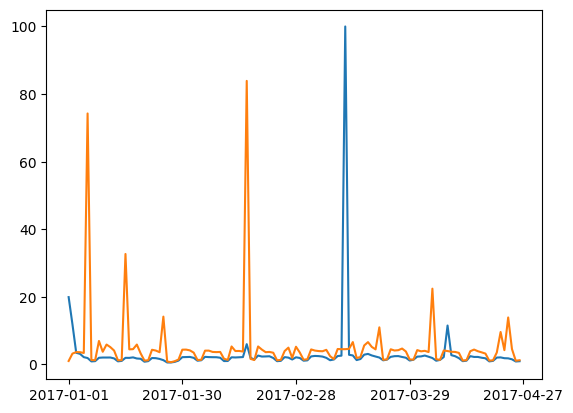

In [4]:
# 1. the most bad method we can imagine
import matplotlib.pyplot as plt
plt.plot(foreign_stock)
plt.plot(local_stock)
plt.xticks(range(0,121,30),period[::29])
plt.show()

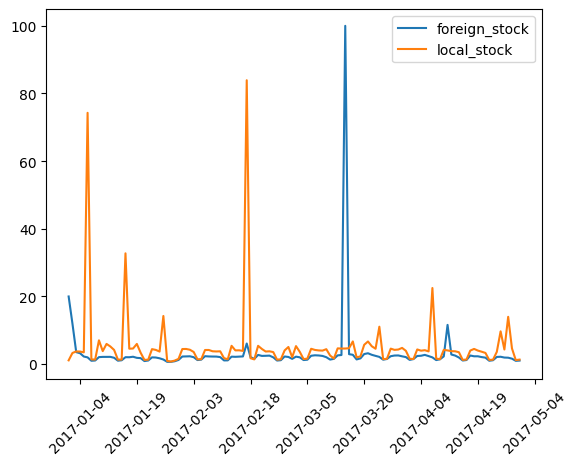

In [5]:
# 2. by pandas looks nice but avoiding real answer

import pandas as pd
import numpy as np
_data = np.stack([foreign_stock,local_stock],axis=1)
_index = pd.to_datetime(period)

df=pd.DataFrame(data=_data,index=_index,columns=['foreign_stock','local_stock'])

# 1st_ans
# df.plot()

# 2nd_ans
from matplotlib.ticker import MaxNLocator
ax = plt.subplot()
plt.plot(df['foreign_stock'],label='foreign_stock')
plt.plot(df['local_stock'],label='local_stock')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MaxNLocator(10))
plt.legend()